In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
logT=4.0
v_th = 12.85*sqrt((10.0**logT)/(10.0**4.0))

1.0


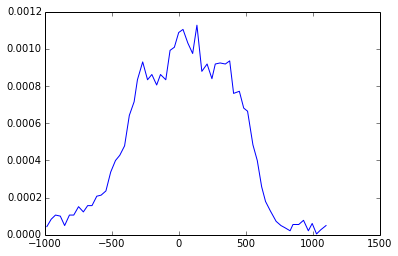

In [3]:
tol_data = loadtxt("../data/obs/tol.txt")
norm = trapz(tol_data[:,1], tol_data[:,0])
tol_data[:,1]= tol_data[:,1]/norm
norm = trapz(tol_data[:,1], tol_data[:,0])
print norm
plot(tol_data[:,0], tol_data[:,1])

In [4]:
!cc analytic_solution.c -lm -o analytic.x

In [37]:
velocity = 320
angle = 0
tau = 2.0E7
filename = "analytic_%.1e_%.1f_%.1f"%(tau, velocity, angle)
command="./analytic.x %f %f %f > %s\n"%(tau, velocity, angle, filename)
print command
a= os.system(command)
sim_data = loadtxt(filename)

./analytic.x 20000000.000000 320.000000 0.000000 > analytic_2.0e+07_320.0_0.0



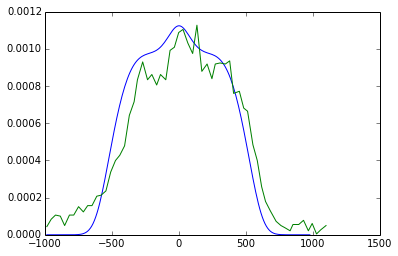

In [38]:
#sim_data = loadtxt("analytic_4.0e+07_500.0_80.0")
norm = trapz(sim_data[:,1], sim_data[:,0]*v_th)
sim_data[:,1] = sim_data[:,1]/norm
plot(sim_data[:,0]*v_th, sim_data[:,1])
plot(tol_data[:,0], tol_data[:,1])

In [ ]:
# tau range 2E7
# velocity range 300, 325, 350, 375, 400, 425, 450
# mi favorito : 2E7 and 325, km/s